In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [71]:
df = pd.read_csv(r'c:/users/srinivas/Overload Ware Labs AI/Data/Train.csv')

In [72]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


To see the first 5 rows

In [73]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


To Check the number of rows and columns - (How big and To find out Column types and missing values)

In [74]:
df.shape

(10999, 12)

To show summary of columns and datatypes

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


To Check for missing values in each column

In [76]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

#Quick numeric overview

In [77]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Lets Analyze the given data

Q1: What % of shipments are delayed?

In [78]:
# 0 = Delayed, 1 = On Time (precise insight - float64)
delayed_count = df['Reached.on.Time_Y.N'].value_counts(normalize=True) * 100 

In [79]:
delayed_count

1    59.669061
0    40.330939
Name: Reached.on.Time_Y.N, dtype: float64

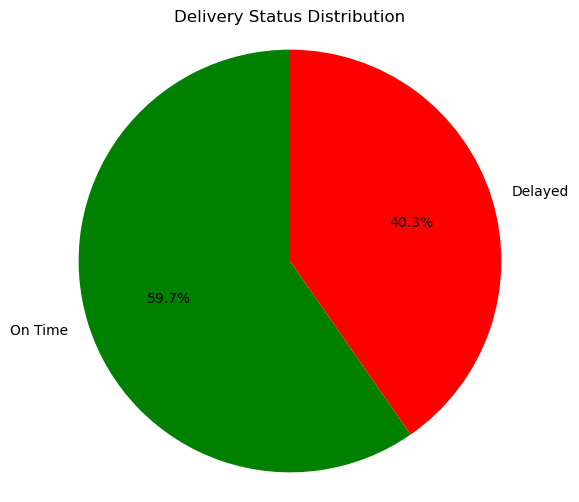

In [80]:
# On-time vs Delayed counts
delivery_counts = df['Reached.on.Time_Y.N'].value_counts()
labels = ['On Time', 'Delayed']
colors = ['green', 'red']

plt.figure(figsize=(6, 6))
plt.pie(delivery_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Delivery Status Distribution')
plt.axis('equal')
plt.show()

Q2: Which shipping mode has the highest delay rate? (Road vs ship vs flight)

In [81]:
#To Filter only delayed orders
delayed_orders = df[df['Reached.on.Time_Y.N'] == 0]

#To Count delays by shipping mode
shipment_mode_delay = delayed_orders['Mode_of_Shipment'].value_counts(normalize=True) * 100
shipment_mode_delay
shipment_mode_delay.round(2)


Ship      67.70
Road      16.34
Flight    15.96
Name: Mode_of_Shipment, dtype: float64

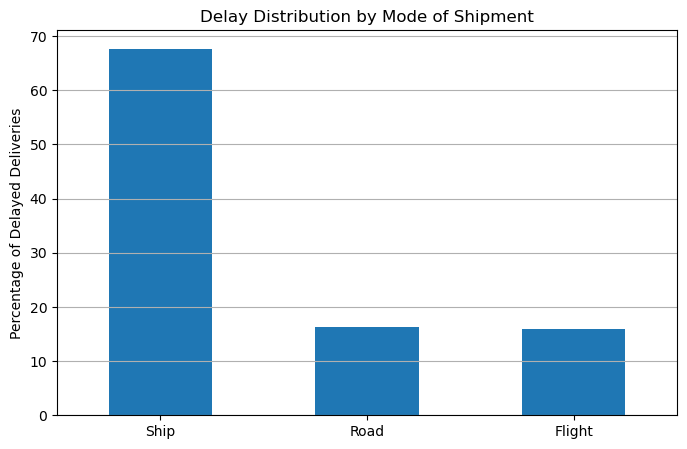

In [82]:
delayed_df = df[df['Reached.on.Time_Y.N'] == 0]
shipment_mode_delay = delayed_df['Mode_of_Shipment'].value_counts(normalize=True) * 100

shipment_mode_delay.plot(kind='bar',figsize=(8, 5))
plt.ylabel('Percentage of Delayed Deliveries')
plt.title('Delay Distribution by Mode of Shipment')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Q3: high-priority products get delayed more or less?

In [83]:
# Delay rate by product importance
delay_by_importance = delayed_orders['Product_importance'].value_counts(normalize=True) * 100
delay_by_importance.round(2)


low       48.62
medium    43.89
high       7.48
Name: Product_importance, dtype: float64

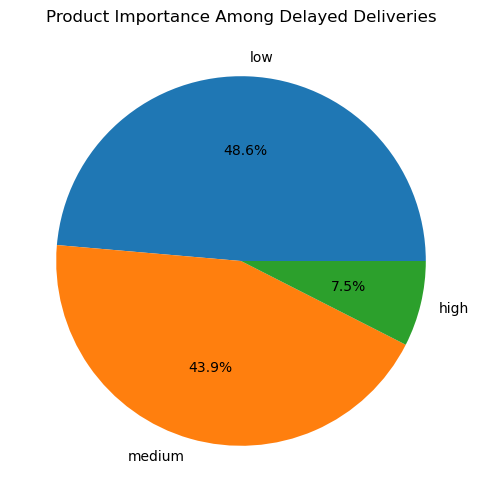

In [84]:
importance_counts = delayed_df['Product_importance'].value_counts(normalize=True) * 100

importance_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Product Importance Among Delayed Deliveries')
plt.ylabel('')
plt.show()

Q4: Does higher discounts lead to more delivery delays?

In [85]:
# Average discount for on-time vs delayed deliveries
df.groupby('Reached.on.Time_Y.N')['Discount_offered'].mean().round(2)


Reached.on.Time_Y.N
0     5.55
1    18.66
Name: Discount_offered, dtype: float64

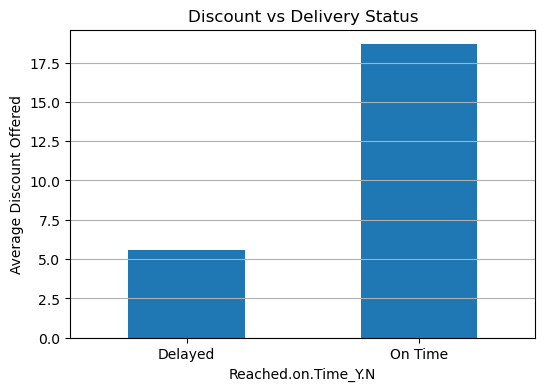

In [86]:
df.groupby('Reached.on.Time_Y.N')['Discount_offered'].mean().plot(kind='bar', figsize=(6, 4))
plt.xticks(ticks=[0,1], labels=['Delayed', 'On Time'], rotation=0)
plt.ylabel('Average Discount Offered')
plt.title('Discount vs Delivery Status')
plt.grid(axis='y')
plt.show()

Q5: To find out which warehouses have the most delivery delays?

In [87]:
warehouse_delay_counts = delayed_orders['Warehouse_block'].value_counts()
warehouse_delay_counts

F    1472
A     758
C     739
D     738
B     729
Name: Warehouse_block, dtype: int64

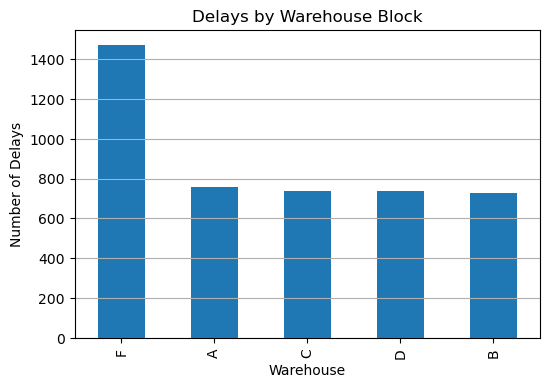

In [88]:
delayed_df['Warehouse_block'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.title('Delays by Warehouse Block')
plt.xlabel('Warehouse')
plt.ylabel('Number of Delays')
plt.grid(axis='y')
plt.show()

Q6: What was the Customer Rating? And was the product delivered on time?

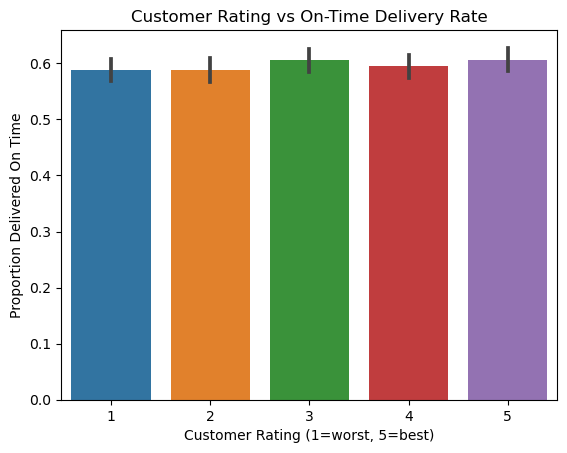

In [99]:
sns.barplot(x='Customer_rating', y='Reached.on.Time_Y.N', data=df)
plt.title('Customer Rating vs On-Time Delivery Rate')
plt.xlabel('Customer Rating (1=worst, 5=best)')
plt.ylabel('Proportion Delivered On Time')
plt.show()

Q7: Is Customer Query Being Answered?

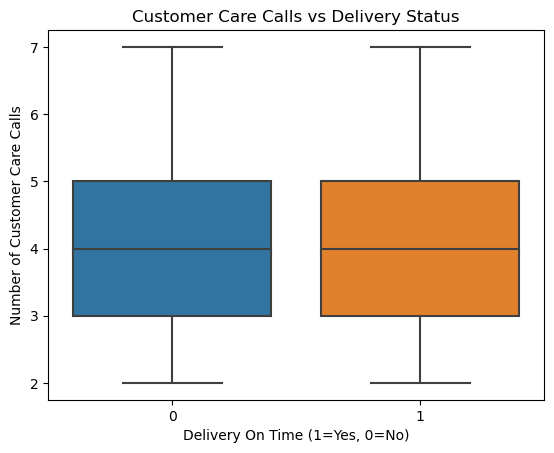

In [93]:
#More calls → potential delivery issues or product dissatisfaction.
sns.boxplot(x='Reached.on.Time_Y.N', y='Customer_care_calls', data=df)
plt.title('Customer Care Calls vs Delivery Status')
plt.xlabel('Delivery On Time (1=Yes, 0=No)')
plt.ylabel('Number of Customer Care Calls')
plt.show()

Q8: If Product Importance is High, does it have Highest Ratings or Get Delivered On Time?

a. Product Importance vs On-Time Delivery:

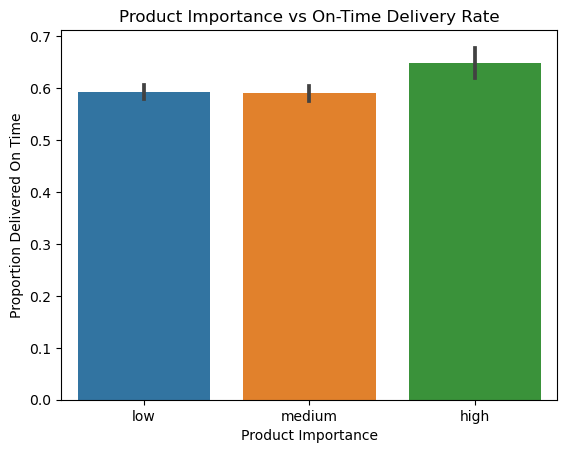

In [100]:
sns.barplot(x='Product_importance', y='Reached.on.Time_Y.N', data=df)
plt.title('Product Importance vs On-Time Delivery Rate')
plt.xlabel('Product Importance')
plt.ylabel('Proportion Delivered On Time')
plt.show()

b. Product Importance vs Customer Rating:

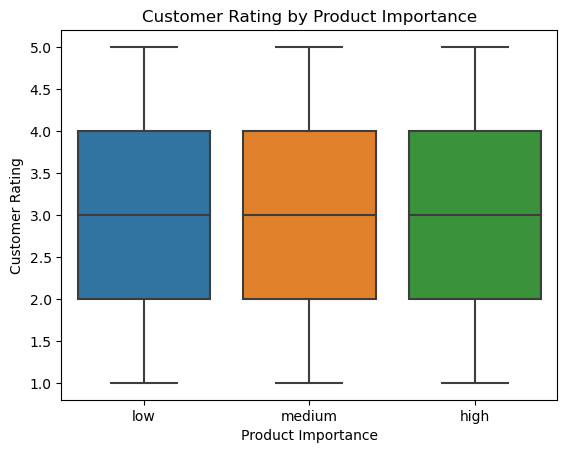

In [101]:
sns.boxplot(x='Product_importance', y='Customer_rating', data=df)
plt.title('Customer Rating by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Customer Rating')
plt.show()